google drive mount

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


현재 위치 바꾸기

In [6]:
%cd drive/MyDrive/kaggle/Titanic/

/content/drive/MyDrive/kaggle/Titanic


# EDA to Prediction (DieTitanic)

## Contents of the Notebook:

Part1: Exploratory Data Analysis(EDA)

1) Analysis of the features.
* 특징 분석

2) Finding any relations or trends considering mulitple features.
* 여러 특징을 고려한 경향과 관계 찾기

Part2: Feature Engineering and Data Cleaning:

1) Adding any few features.
* 특징 추가하기

2) Romoving redundant features.
* 불필요한 특징 삭제

3) Converting features into suitable form for modeling
* 모델을 위해 적절한 형태로 특징 변환

Part3: Predictive Modeling

1) Running Basic Algorithms.
* 기본적인 알고리즘 실행

2) Cross Validation

3) Ensembling

4) Important Features Extraction
* 중요한 특징 추출

# Part1 : Exploratory Data Analysis(EDA)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(font_scale = 2)

In [8]:
data = pd.read_csv('train.csv')

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

the Age, Cabin and Embarked have null values. I will try to fix them.

- Age, Cabin, Embarked에 빈 값이 있다.

How many Survived??

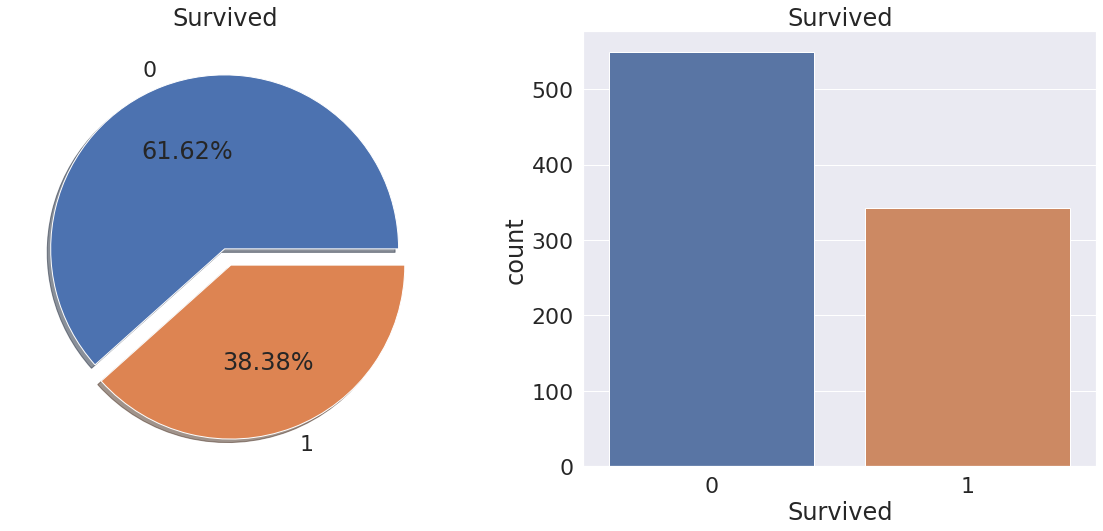

In [12]:
# 1행 2열 18-8크기의 figure를 생성
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.2f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

it is evident that not many passengers survived the accident.
* 많은 사람들이 살아남지 못했다는 증거다.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survivied the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.
* 훈련 데이터의 891명 중 350명이 살아남았고 즉 38.4%의 사람이 살아남은 것이다. 우리는 더 깊이 파서 더 좋은 인사이트를 얻어야한다. 그리고 어떤 분류의 승객이 살아남는지, 죽는지를 알아내야한다.

we will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port of Embarcation, Age, etc.
* 우리는 데이터셋의 다른 특징을 사용하여 생존률을 확인할 것이다. 

First let us understand the different types of features.
* 우선 우리는 다른 종류의 특징을 이해해보자.

## Types Of Features

### Categorical Features:
A categorical variables is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories(male and female). Now we cannnot sort or give any ordering to such variables. They are alse known as Nominal Variables.
* 분류 변수는 두개 혹은 그 이상의 분류를 가지고 있는 것이고 각각의 값은 분류화될 수 있는 특징이다. 예를 들어, 성은 분류형 변수이며 이는 남자와 여자 두 분류를 가지고 있다. 우리는 이러한 변수를 정렬하거나 순서를 매길 수 없다. 분류형 변수는 nomial 변수라고도 한다.

Categorical Features in the dataset : Sex, Embarked.

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. 
* 순서형 변수는 분류형 변수와 비슷하지만 다른점은 관계의 순서를 매기고 정렬할 수 있다는 차이가 있다.

For eg: If we have a feature like Height with values Tall, Medium, short, then Height is a ordinal variable.
* 예를 들어, 우리가 키와 같은 Tall, Medium, short와 같은 특징을 가지고 있다고 할 때 Height는 순서형 변수이다.

Here we can have a relative sort in the variable.

Ordinal Features in the dataset : PClass


### Continuous Feature:
A feature is said to be continuous if it can take values between any two points or between the minimum or maximum values in the features column.
* 연속형 특징은 우리가 어떤 두 점 사이나 최대, 최소 사이 값을 의미한다.

Continous Features in the dataset : Age

## Analysing the Features

### Sex -> categorical Feature

In [13]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

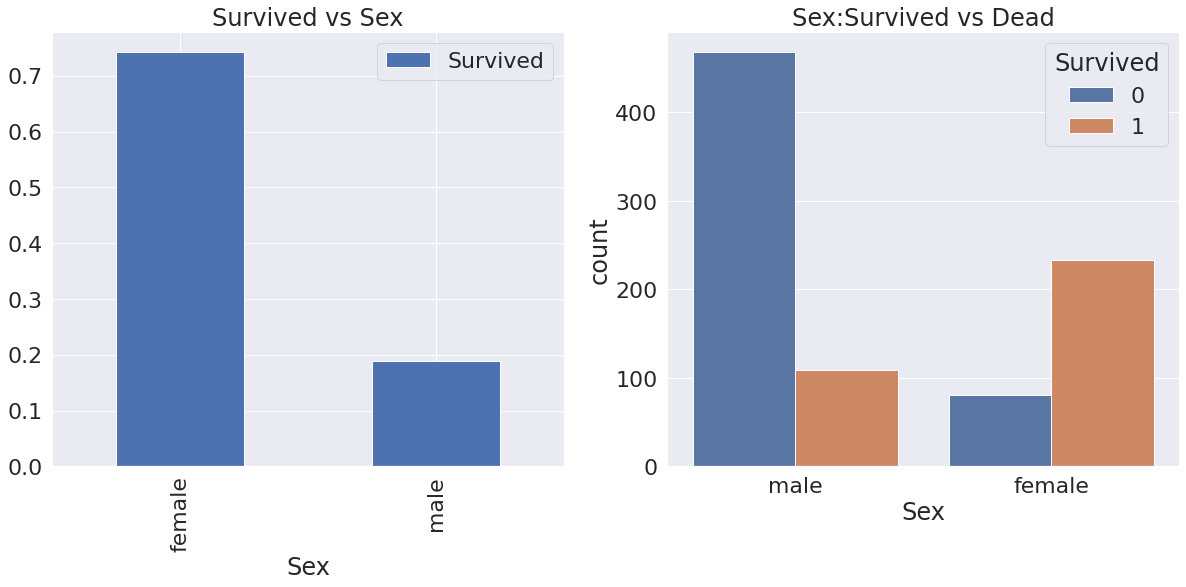

In [14]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%. 
* 흥미롭다. 배에탄 남자가 여자보다 훨씬 많다. 그러나 여자의 생존자는 남자의 생존자의 거의 두배이다. 여자의 생존률은 75%이고 반면, 남자는 18-19%이다.

This looks to be a very important feature for modeling. But is it the best? Let's check other features.
* 이 특징은 모델링에 중요한 특징이다.

### Pclass -> Ordinal Feature

In [15]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


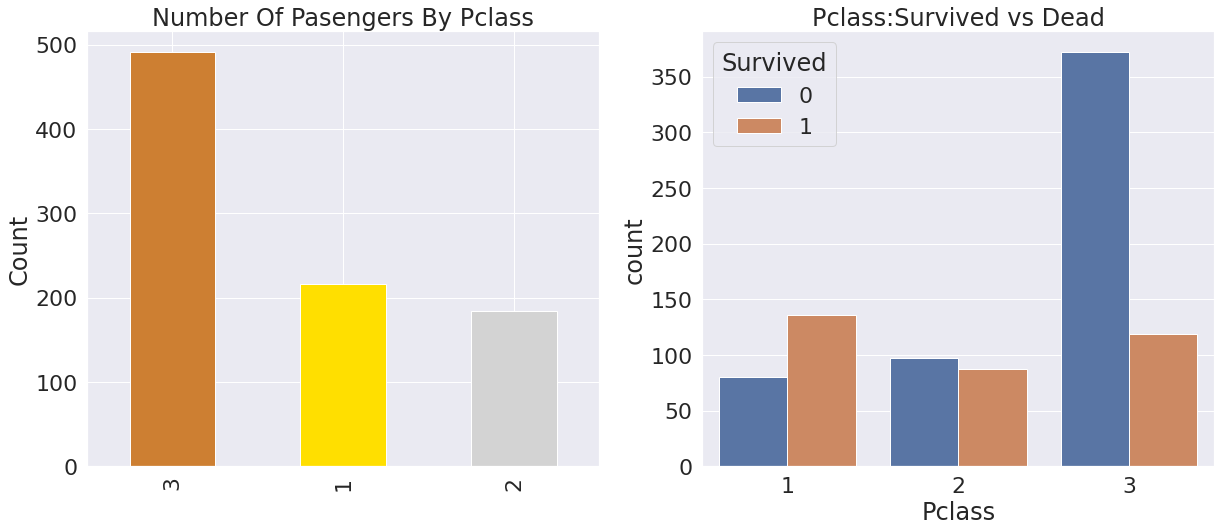

In [16]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Pasengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say Money Can't Buy Everything. But we can clearly see that Passengers OF Pclass 1 were given a very high priority while rescue.
* 돈으로 모든 것을 살 수 없다고 말한다. 그러나 우리는 명확하게 Pclass 1의 승객이 구조중에 높은 우선순위인 것을 알 수 있다. 

Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.
* 비록 Pclass3에 탄 승객이 많지만, 그 중 생존자는 적다. 25% 정도 이다.

For Pclass 1 survived is around 63% while for Pclass 2 is around 48%. So money and status matters. Such as materialistic world.
* Pclass1은 63% 생존했고 Pclass2는 48% 생존했다. 그래서 돈과 지위는 중요하다. 아주 물질적인 세계다.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with Wex and Pclass Togeter.

In [17]:
pd.crosstab([data['Sex'], data['Survived']], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

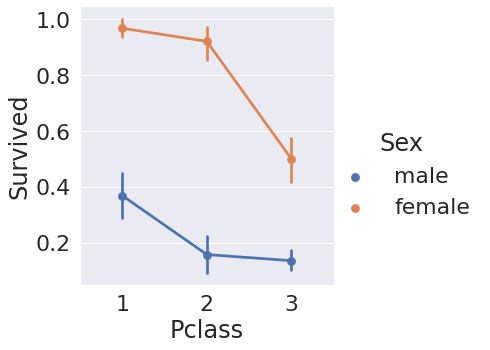

In [18]:
# (x축 데이터, y축 데이터, 범주, 데이터)
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

We use FactorPlot in this case, becuase they make the seperation of categorical values easy.
*FactorPlot는 분류형 데이터를 더 분리하기 쉽다.

Looking at the CrossTab and the FactorPlot. we can easily infer that survival for Women  from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.
*여자 Pclass1은 94명 중에 3명만 죽어 생존률이 95-96%나 된다.

It is evient that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.
*Pclass와는 관련이 없고 여자는 가장 중요한 구조요소 였다. 심지어 PClass1의 남자 승객은 아주 낮은 생존률을 가지고 있다.

Looks like Pclass is also an important feature. Lets analyse other features.


### Age -> Continuous Feature

In [19]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [20]:
# describe 메소드를 사용하면 통계정보를 바로 알 수 있다.
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'count')

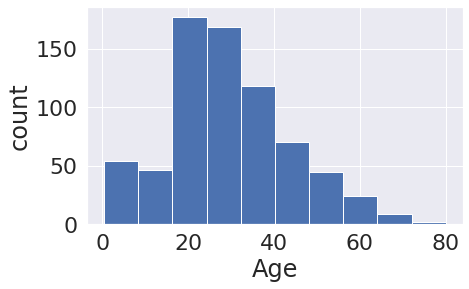

In [21]:
# 히스로그램은 주로 continuous한 정보를 파악할 때 사용한다.
data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('count')

Text(0, 0.5, 'count')

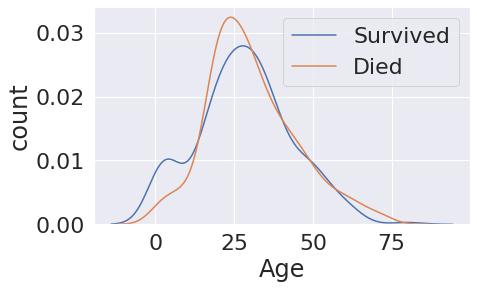

In [22]:
# 이진 분류의 경우 continuous 데이터를 파악할 때 활용
# 나이에 따라 생존 여부를 한눈에 파악하기
sns.kdeplot(data.loc[data['Survived'] == 1, 'Age'], label = 'Survived')
sns.kdeplot(data.loc[data['Survived'] == 0, 'Age'], label = 'Died')
# sns.kdeplot(data['Age'], hue = data['Survived'])
plt.legend() # 범례 표시를 위한 메소드
plt.xlabel('Age')
plt.ylabel('count')

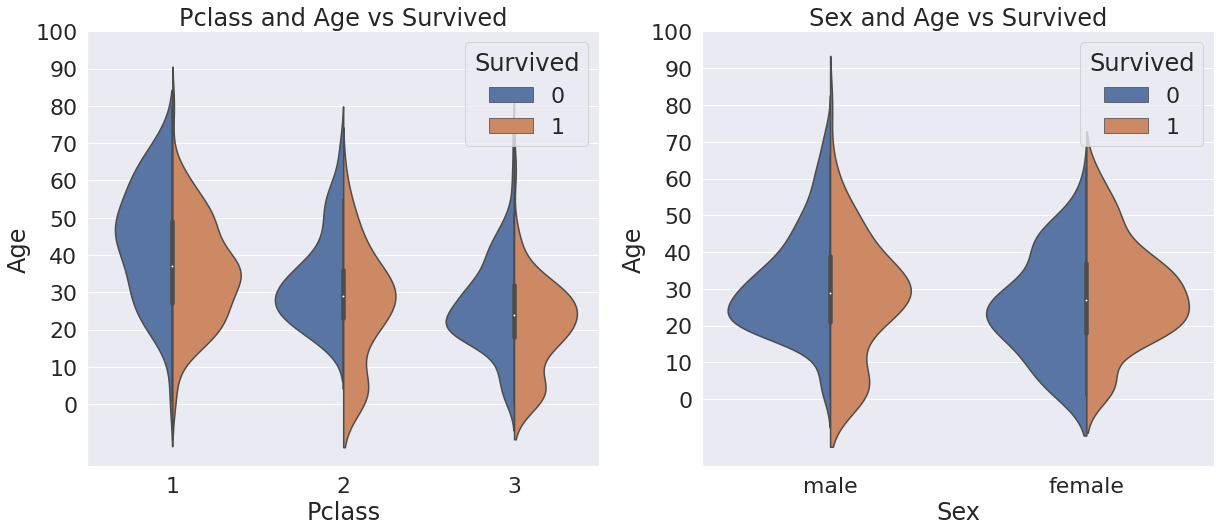

In [23]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

Observations:

1) The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrecspective of the Pclass. 
* 아이들의 수는 Pclass가 높아질 수록 많아지고, 10살 미만의 승객의 생존률은 Pclass와 무관하게 좋아진다는 사실을 알 수 있다.

2)Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for women.
* Pclass1의 20-50살의 승객의 생존룰은 높고 이는 여자이면 더 높다. 다른 차트인데 비교 가능?

3) For males, the survival chances decreases with and increase in age.
* 남자의 생존률은 나이가 증가함에 따라 낮아진다.

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

* 나이 Feature에는 177개의 빈 값이 있다. 이 빈 값을 평균 값으로 추정할 수 있다.

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??
* 그러나 문제는, 많은 다양한 나이를 가진 많은 사람이 있다. 우리는 그냥 4살 아이를 평균인 29살로 처리할 수 없다. 나이-밴드에 분포된 것을 알 수 있는 방법이 없나?

Bingo!!! we can check the Name feature. Looking upon the feature, we can see that the names have salutation like Mr or Mrs. Thus we can assign the mean values of mr and Mrs to the respective groups
* Name Feature에서 Mr나 Mrs를 이용하여 나이를 추정한다.

**What's in a Name? -> Feature**

In [24]:
# data에 Initial 열 추가
data['Initial'] = 0

# extract메소드 정규표현식에 대한 것을 추출가능 문자에 .이 붙은 것을 추출
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [25]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values

* *Mlle나 Mme는 Miss를 잘못 쓴 것이다.*
* *어떻게 이를 알았나????*
* *프랑스어로 Mme는 여자를 의미하고, Mlle는 결혼하지 않은 여자를 의미한다.*

In [26]:
# 바꾸기
# inplace = True 원본 데이터가 바뀐다.
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [27]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [28]:
# 각 그룹의 평균 값으로 빈 값을 채우기
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'), 'Age'] = 46

In [29]:
data.isnull().sum()
# null 데이터가 있는지 없는지 알 수 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

null data는 채워야 하는 경우도 있고 그렇지 않은 경우도 있다.
이는 모델에 적용했을 때 어떤 경우가 더 결과가 좋은지 여부로 판단한다.
여기서는 Age의 Null data를 각 그룹의 평균 값으로 채워주었다.

캐글 머신러닝 문제를 풀 때 해야하는 일
1. Null Data를 체크한다.
2. EDA를 진행한다.
3. Cross Vallidation system을 빠르게 만들어야한다.
=> 좋은 CV를 만들었는지 판단하는 여부는 Leaderboard 값과 CV의 값이 비슷한 정도 판단한다.

=> 제출수가 제한이 있기 때문에 CV가 LB score와 선형적으로 일치하는 것을 찾는 것이 아주 중요하다.

=> 캐글에서 Public Leaderboard에서 좋은 점수를 받을 수 있지만 Private Leaderboard에서는 좋은 점수를 받지 못할 수 있다. Private이 진짜 등수이다.

=> Discussion을 통해 고수들의 노하우를 알 수 있다.


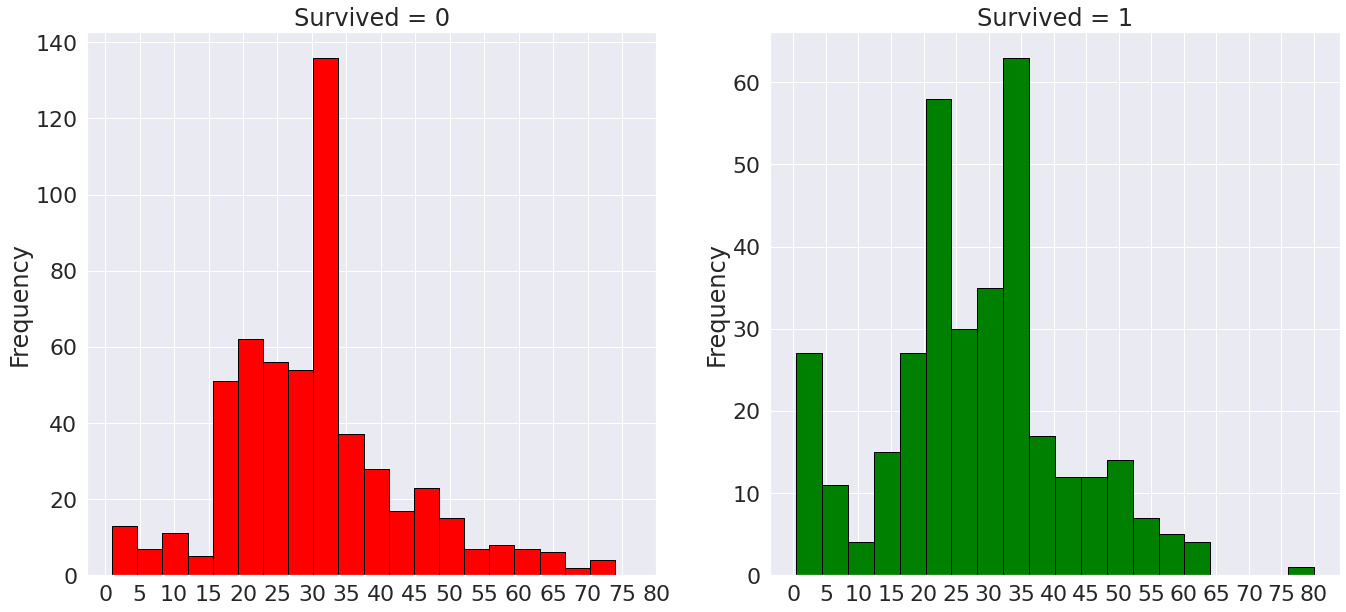

In [30]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data.loc[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

Observations:

1) The Toddlers(age<5) were saved in large numbers(The Women and Chile First Policy).
- 5세 이하는 생존자가 많다.

2) The oldest Passenger was saved(80 years).
- 최고령자는 살았다.

3) Maximum number of deaths were in the age group of 30-40.
- 30-40대가 사망자가 가장 많다.

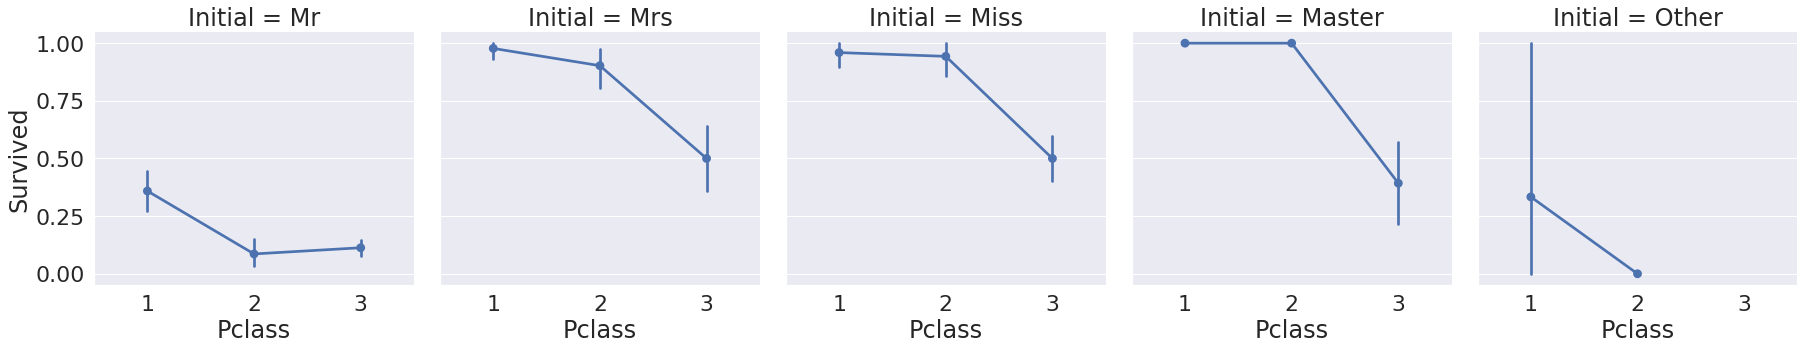

In [31]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.
- 여자와 아이들은 Pclass와 관계 없이 첫번째이다.

### Embarked -> Categorical Value

In [32]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

Chances for Survival by Port of Embarkation

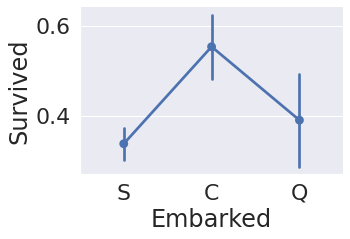

In [33]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf() # get current figure
fig.set_size_inches(5, 3)
plt.show()

The chances for survival for Port C is hightest around 0.55 while it is lowest for S.
- C에서가 가장 생존률이 높고 S에서가 가장 낮다.

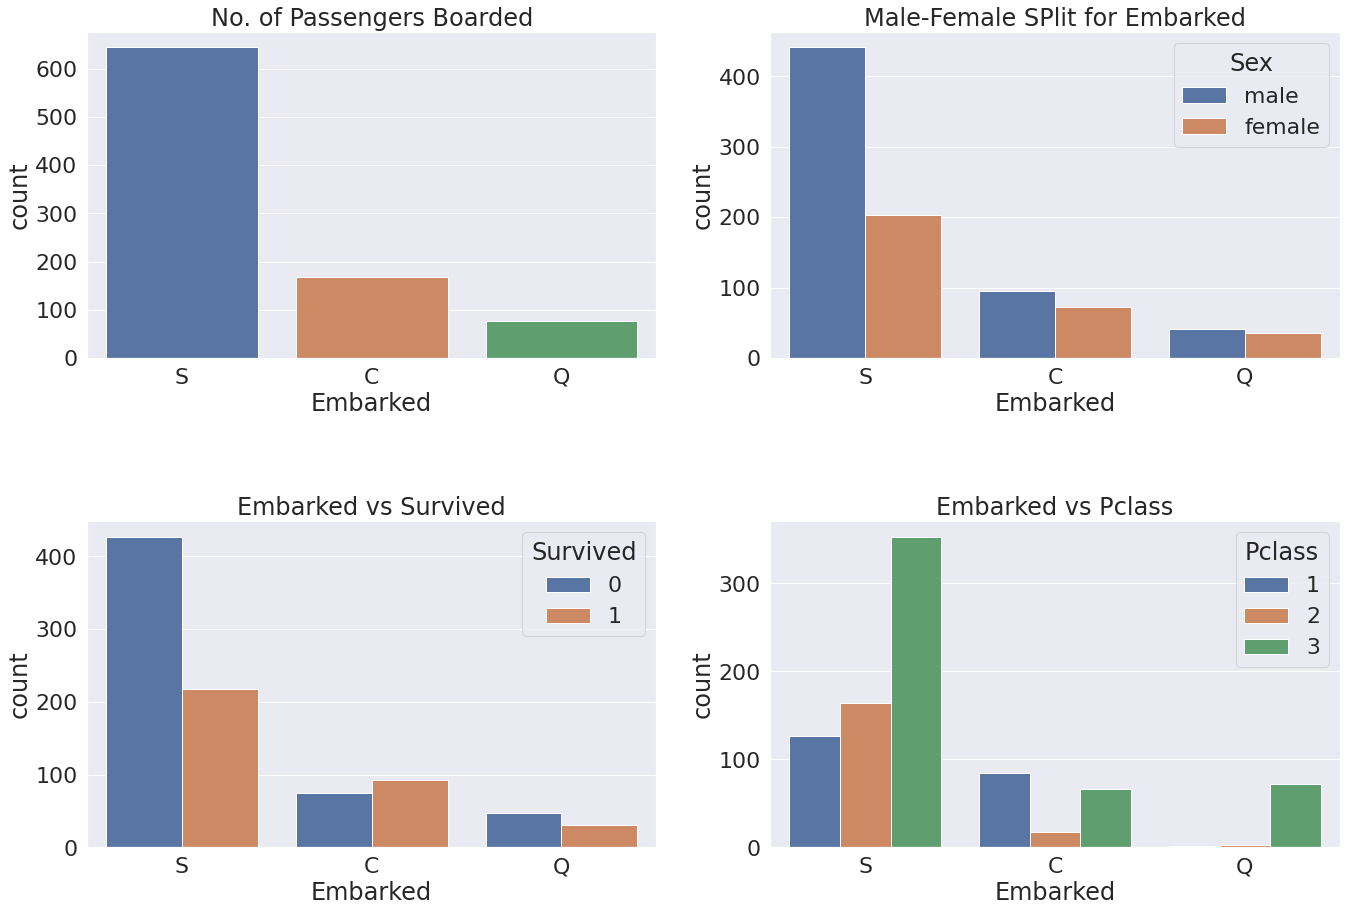

In [34]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = data, ax = ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0, 1])
ax[0, 1].set_title('Male-Female SPlit for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observations:**

1) Maximum passengers boarded from S. Majority of them being from Pclass3.
- S에서 가장 많이 탔고 Pclass3 사람이 주였다.

2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passendgers.
- C는 좋은 생존률을 보인다. 이유는 Pcalss1, Pclass2 승객을 모두 살렸기 때문이다.

3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.
- 부자들 중에서는 S에서 탄사람이 많아보인다. 그러나 생존률은 낮다. 이는 Pclass3 사람들이 81%가 죽었기 때문

4) Port Q had almost 95% of the passengers were from Pclass3.
- Q에서는 95% 가까이의 승객이 Pclass3 이다.

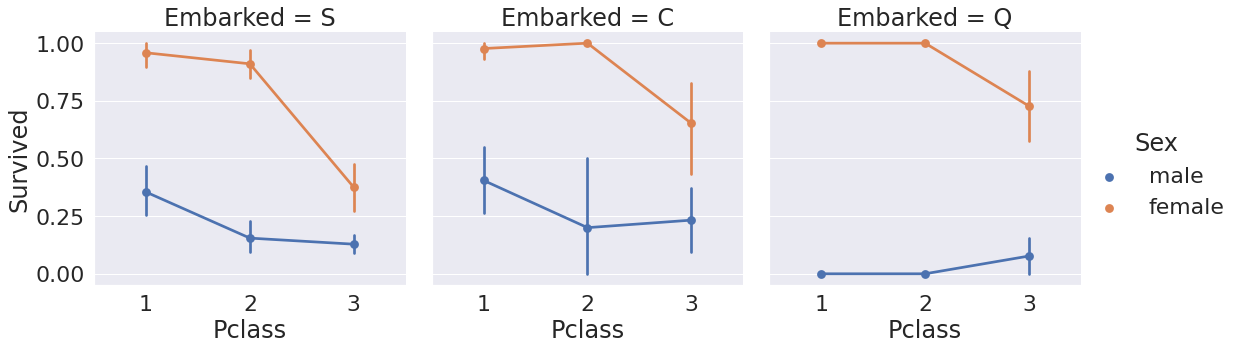

In [35]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

**Observations:**

1) The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective for the Pclass.
- Pclass와 무관하게 Pclass 1, 2의 여자는 거의 생존률이 1에 가깝다.

2) Port S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low.(Money Matters)
- S 항구의 Pclass3 사람들은 여자 남자 모두 생존률이 낮다.

3) Port Q looks to be unlukiest for Men, as almost all were from Pclass 3.
- Q 항구의 남자는 아주 운이 없다. 이는 거의 Pclass 3 사람이기 때문이다.

**Filling Embarked NaN**

As we saw that maximum passengers boarded from Port S, we replace NaN with S.
- S 항구에서 가장 많이 탑승했기 때문에 빈 값은 S로 채워준다.

In [36]:
data['Embarked'].fillna('S', inplace = True)

In [37]:

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

### SibSip -> Discrete Feature

This feature represents whether a person is alone or with his family members.

sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [ ]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


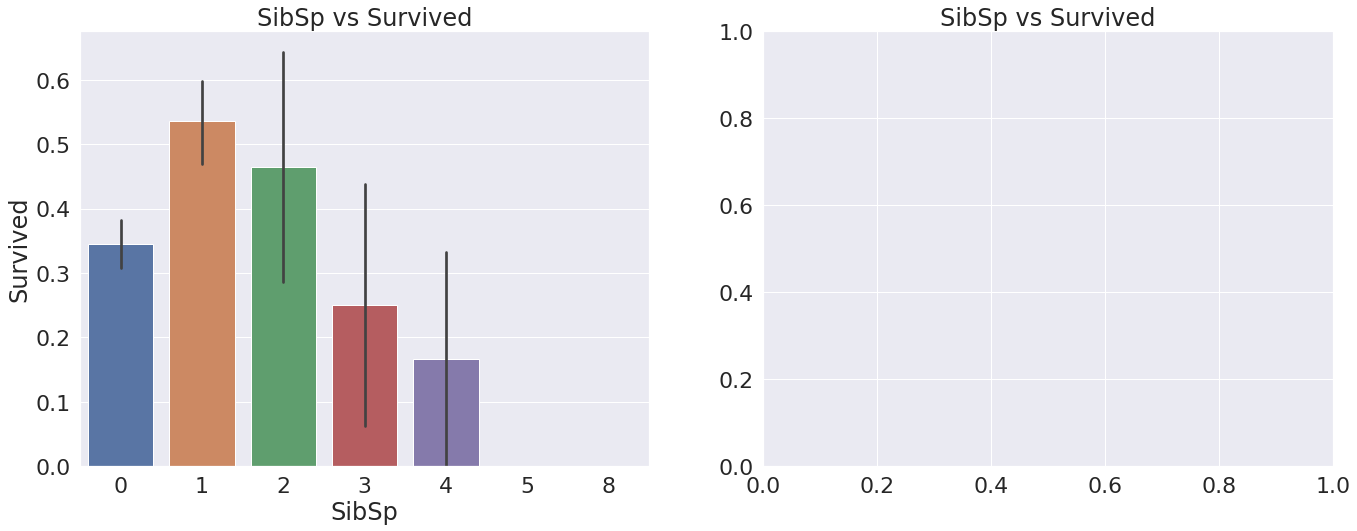

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

factorplot이 그려지지 않음 왜?
-> factorplot에는 ax 파라미터가 없음

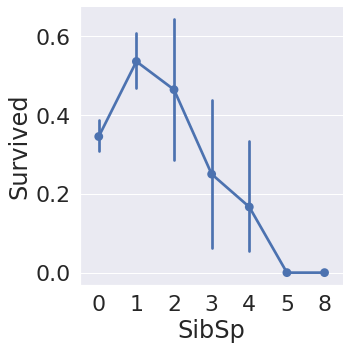

In [42]:
sns.factorplot('SibSp', 'Survived', data = data)

In [43]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations:

the barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughtly decreases if the number of siblings increase. This makes sense. that is. if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8members is 0%. The reason may be Pclass?
- 혼자있는 경우 생존률이 34.5%이다. 친척이 늘어날수록 생존률은 줄어든다. 이는 이해하기 쉽다. 만약 내가 가족이 있다면, 나는 나대신 그들을 살리려고 할 것이다. 놀랍게도 5-8명의 가족인 있는 생존률은 0% 이다. 

the reason is Pclass. the crosstab shows that person with SibSp > 3 were all in Pclass3. it is imminent that all the large families in Pclass3(>3) died.
- 3명 이상인 사람은 모두 Pclass 3이다. 따라서 생존률이 낮았다.

### Parch

In [44]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

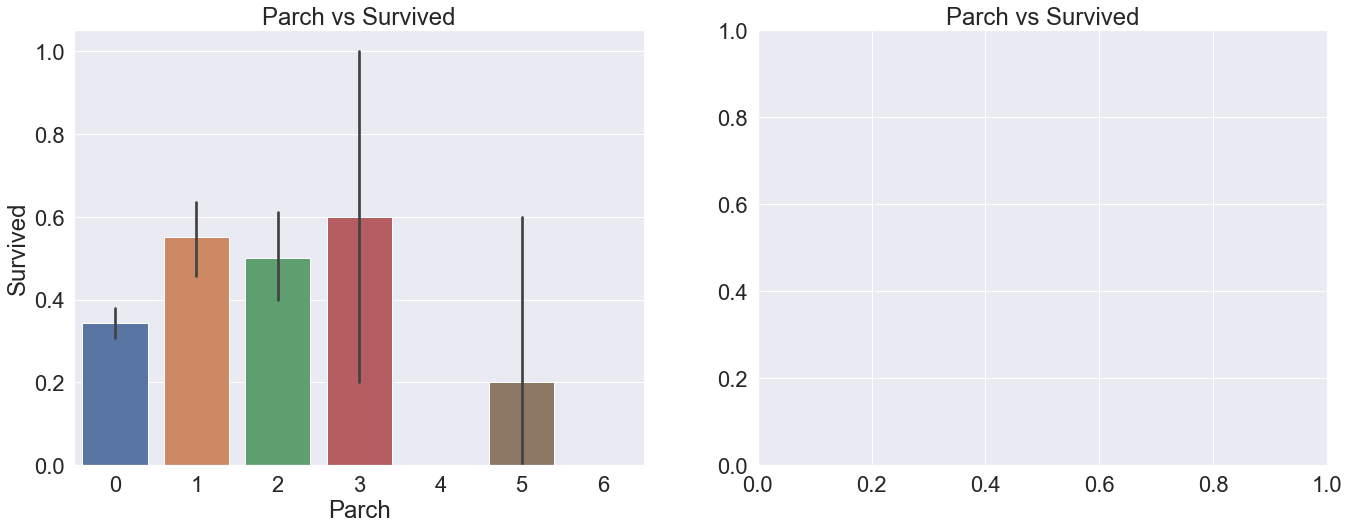

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('Parch', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

factorplot 출력 안됨

따로 출력

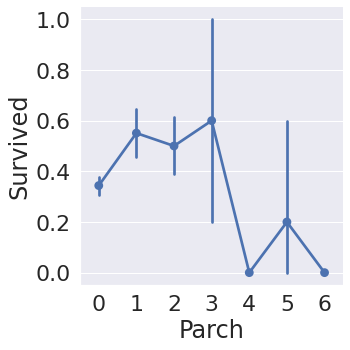

In [45]:
sns.factorplot('Parch', 'Survived', data = data)

Observations:

here two the results are quite similar. Passengers with their parents on board have greater chance of survival. It howerver reduces as the number goes up.
- 부모와 같이 탄 승객은 생존률이 더 높았다. 하지만 그 수가 커지면 낮아진다.

the chances of survival is good for somebody who has 1-3 parents on the ship. being alone also proves to be fatal and the chances for survival decreases when sombody has > 4 parents on the ship.
- 1-3명의 부모와 같이 탄 사람은 생존률이 좋았고 4명이 넘으면 생존률이 낮아졌다.

### Feature Engineering (영상 예시)
 
 - 1st 클래스, 여성, S and C 가 생존률이 높았다.
 - Sibsp > 3 생존률 낮다.
 

In [46]:
data['new_cat_pclass_sex'] = data['Pclass'].astype(str) + '_' + data['Sex'].astype(str)

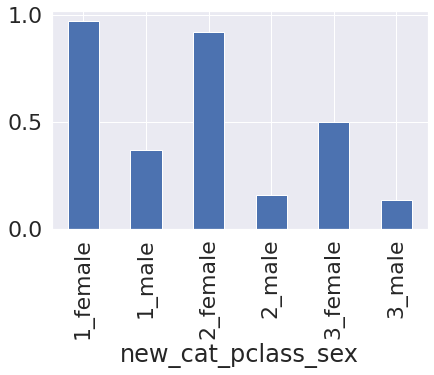

In [47]:
data.groupby('new_cat_pclass_sex')['Survived'].mean().plot.bar()

In [48]:
data['new_cat_pclass_sex_embarked'] = data['Pclass'].astype(str) + '_' + data['Sex'].astype(str) +'_' + data['Embarked'].astype(str)

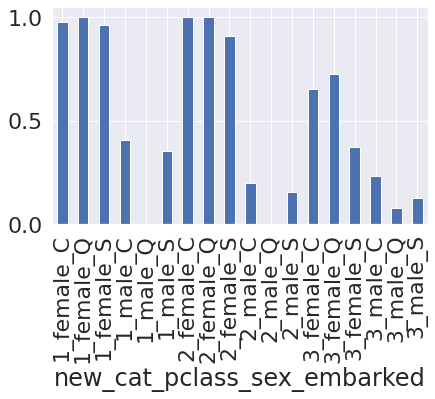

In [49]:
data.groupby('new_cat_pclass_sex_embarked')['Survived'].mean().plot.bar()

너무 많은 카테고리는 분석이 어렵다.

### Fare ->continuous Feature

In [50]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The lowest fare is 0.0.

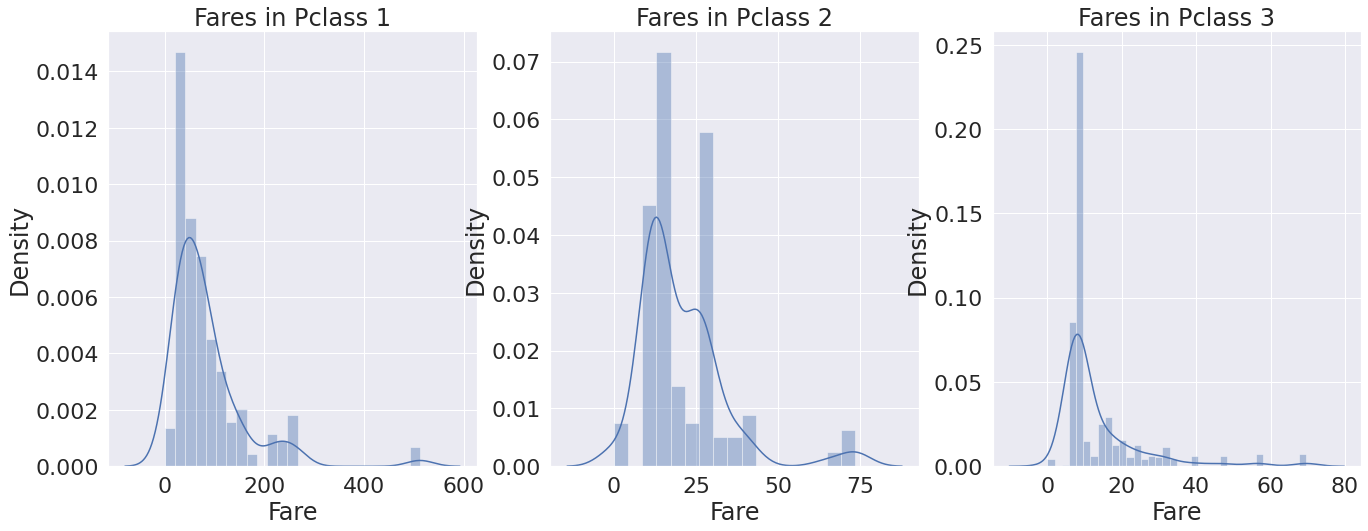

In [58]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

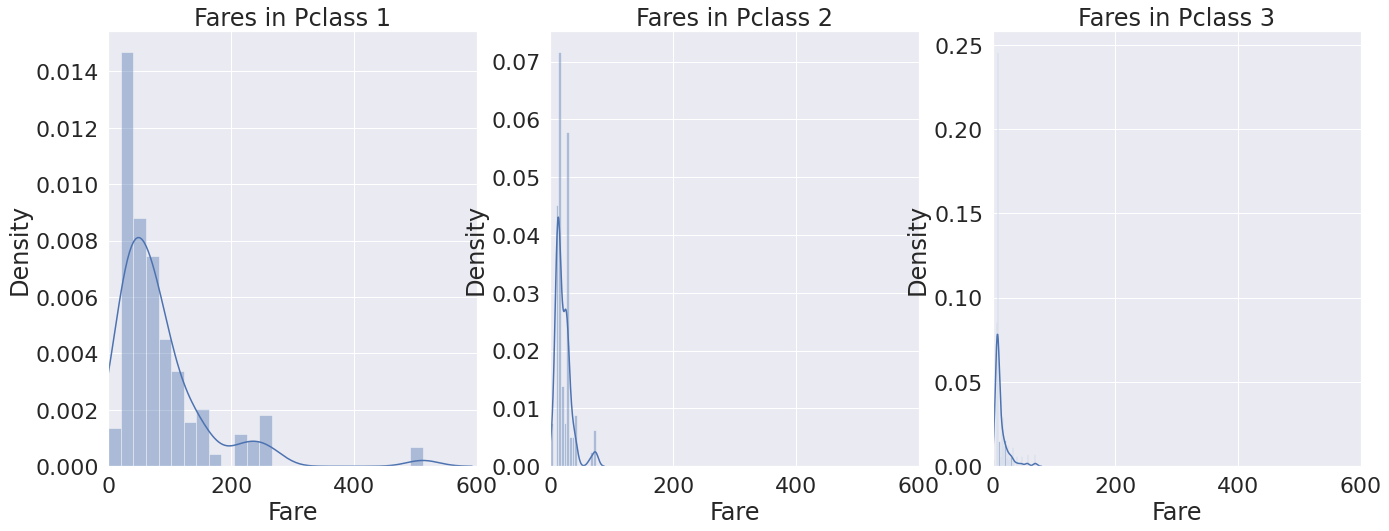

In [59]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')
ax[0].set_xlim([0, 600])

sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')
ax[1].set_xlim([0, 600])

sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')
ax[2].set_xlim([0, 600])

plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is alse continuous, we cna convert into discrete values by using binning.

- Pclass1은 넓은 요금분포를 가지고 요금이 커질수록 밀도가 감소한다.continuous하기 때문에 별개의 값으로 바꿀 수 있다. 이진화를 이용하여

**Observations in a Nutshell for all features:**
모든 특징 관찰 요약

Sex : The chance of survival for women is high as compared to men.
- 여자가 남자보다 생존률이 높다.

Pclass : there is a visible trend thatbeing a 1st class passenger gives you better chances of survival. the survival rate for Pclas3 is very low. for women, the chanced of survival from Pclass1 is almost 1 and is high too for those from Pclas2. Money wins!!!.
- 1st 승객은 생존률이 높고 Pclass3는 매우 낮다. 여자의 경우 Pclass1은 거의 생존률이 1이다. Pclass2보다도 보다.

Age : children less than 5-10years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.
- 5-10살의 생존률이 높다. 15-35은 많이 죽었다.

Embarked : this is a very interesting feature. The chances of survial at C look to be better than even though the majority of Pclass 1 passengers got up at S. Passenger at Q were all from Paclass3.
- C에서 탄사람이 S에서 탄사람보다 생존률이 높았다. S에서는 Pclass 1 사람이 많았음에도 불구하고. Q에서 탄사람의 거의 Pclass 3였다.

Parch + SibSp: Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probalbity rather than being alone or having a large family travelling with you.
- 1-2 천척, 배우자나 1-3 부모님과 함께 탄 승객은 생존률이 높았다. 


### Correlation Between The Features

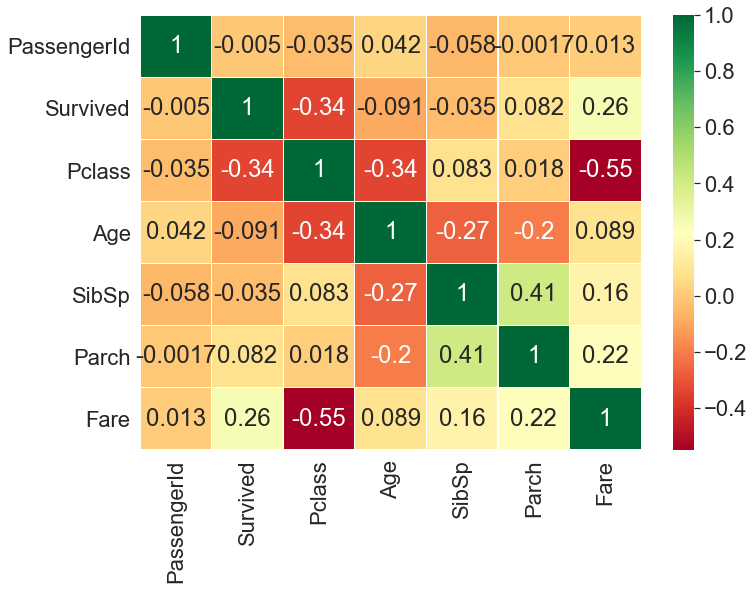

In [ ]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

**Interpreting The heatmap**

the first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.
- 처음에 알파벳이나 문자열은 상관관계를 알 수 없기때문에 숫자적 특성에 주목해야한다.

POSITIVE CORREALATION:
If an increase in feature A leads to increaws in feature B, then they are positvily correlated. A value 1 menas perfoect posive correlation
- 좋은 상관관계: A 특성이 증가할 때 B 특성도 같이 증가한다면 좋은 상관관계이다.

NEGATIVE CORRELATION:
If an increase in feature A leads to decrease in feaure B, then they are negatively correlated. A value -1 means perfect negative correlation.
- 나쁜 상관관계 : A 특성이 증가할 때 B 특성이 감사한다면 나쁜 상관관계이다.

Now lets say the two features are hightly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing hightly similar information and there is very little or no variance in information. this is known as MultiColinearriy as both of them contains almost the same information.
- 상관관계가 높다는 것은 두 특성이 매우 비슷하다는 정보이고 이는 다양성이 없다는 것을 의미한다. 이는 다상관선형성이라고 하며 거의 같은 정보를 가지고 있다는 것이다.

so do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.
- 그래서 둘 중 하나는 불필요하다. 모델을 만들거나 훈련시킬 때 불필요한 특성을 제거하는 것이 훈련 시간도 아끼고 많은 이점들이 있다.


Now from the above heatmap, we can see that the features are not much correlated. The hightest corelation is beween SibSP and PArch i.e 0.41. So we can carry on with all features.
- 가장 높은 상관관계는 SIbSP와 Parch 이며 이는 0.41이다. 

# Part2: Feature Engineering and Data Cleaning

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. there maybe many redundant features which should be eliminated. also we can get or add new features by observing or extracting information from other features.
- 모든 특성이 중요하지는 않다. 삭제해야하는 불필요한 특성이 있다. 관찰하거나 다른 특성으로부터 추출한 정보로 새로운 특성을 추가하거나 얻을 수 있다.

An example would be getting the initials feature using the name Feature. Lets see if we can get any new features and eliminate a few. also we will tranfrom the existing relevant features to suitable form for Predictive Modelling.
- Name 특성을 이용하여 initial 특성을 얻은 예가 있다. 우리는 새로운 특성을 얻을 수도 제거할수도 있다. 또는 존재하는 관련있는 특성을 예측모델에 적합하게 변형시킬 것이다. 

### Age_band

Problem with Age Feature:
As I have mentioned earlier that Age is a continuous feature. there is a problem with Continous Variables in Machine Learning Models.
- Age 특성은 연속적인 특성이다. 머신러닝 모델에서 연속적인 변수는 문제가 있다.

Eg: If i say to group or arrange Sports Person by sex, we can easily segregate them by Male and Female.
- 예를 들어: 스포츠인을 성별로 나누라고하면 우리는 남성과 여성으로 쉽게 나눌 수 있다.

Now if I say to group them by their age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.
- 나이로 나누라고 한다면 어떻게 하겠는가? 30명이 있다면 30개의 값으로 있는 것이다. 이는 문제적이다.

We need to convert these continuous values into categorical values by either Binning or Normalization. I will be using binning i.e group a range of ages into a single bin or assign them a single value.
- 우리는 연속적인 값을 이진화나 표준화를 통해 범주형 값으로 바꿔야한다. 나는 이진화를 사용할 것이다. 이는 나이의 범위를 묶어 한개의 양자나 하나의 값으로 처리하는 것이다.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5 = 16 bins of size 16.
- 최고령이 80살이기 때문에 0부터 80살까지를 5개의 양자로 나눌것이다. 크기가 16이 된다.

In [60]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,3_male_S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,1_female_C,2


In [61]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


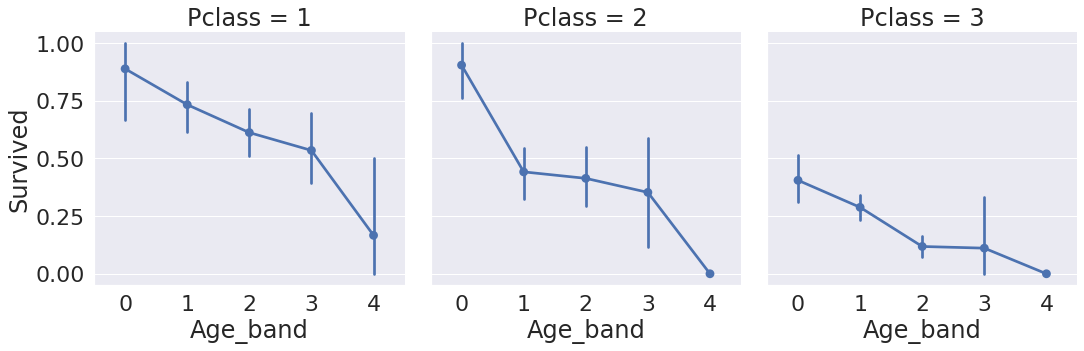

In [62]:
sns.factorplot('Age_band', 'Survived', data = data, col = 'Pclass')
plt.show()

true that.. the survival rate decreases as the age increases irrespective of the Pclass
- 생존률은 나이가 증가함에다라 감소하였다. Pclass와 관계 없이

### Family_Size and Alone
At this point, we can create a new feature called "Family_size" and Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the pesesengers. alone will denote whether a passenger is alone or not.
- Family_size와 Alone이라는 새로운 특성을 만들고 분석할 수 있다. 이 특성은 Parch와 SibSp의 합이다. 이는 결합 데이터를 주고 우리는 승객의 가족의 크기와 관련있는 생존률을 확인할 수 있다. Alone은 승객이 혼자 인지 아닌지를 의미한다.

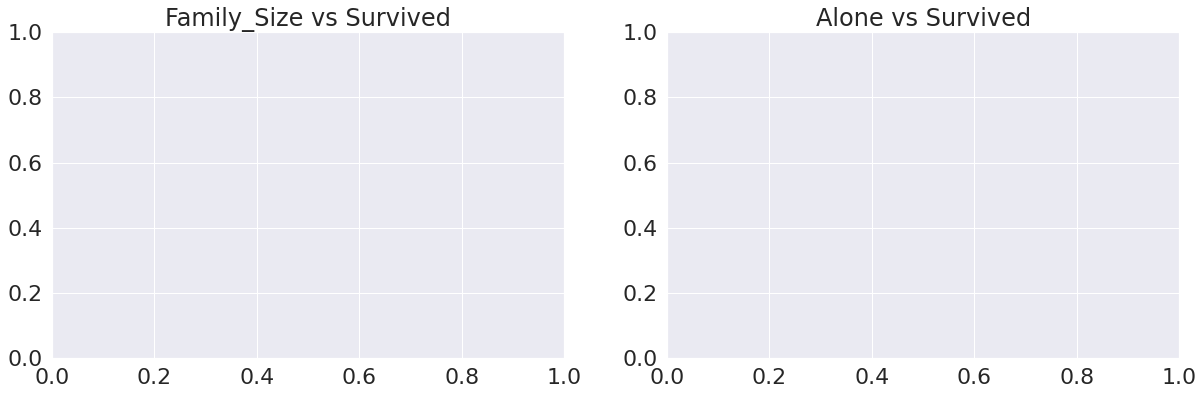

In [70]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.factorplot('Family_Size', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

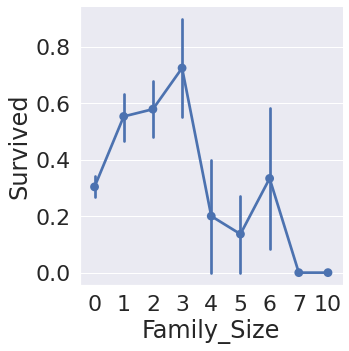

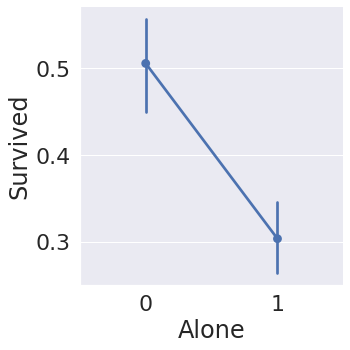

In [71]:
sns.factorplot('Family_Size','Survived',data=data)
sns.factorplot('Alone','Survived',data=data)

Family_Size = 0 means that the passenger is alone. clearly, if you are alone or family_size = 0, then chances for survival is very low. For family size > 4, the cahances decrease too. this also looks to be an importnat feature for the model. lets examine this further.
- Family_Size가 0이면 혼자를 의미한다. 만약 혼자거나 Family_size가 0이면 생존률은 낮다. family_size가 4보다 크면 생존률이 낮아진다. 이것은 중요한 특성이다. 

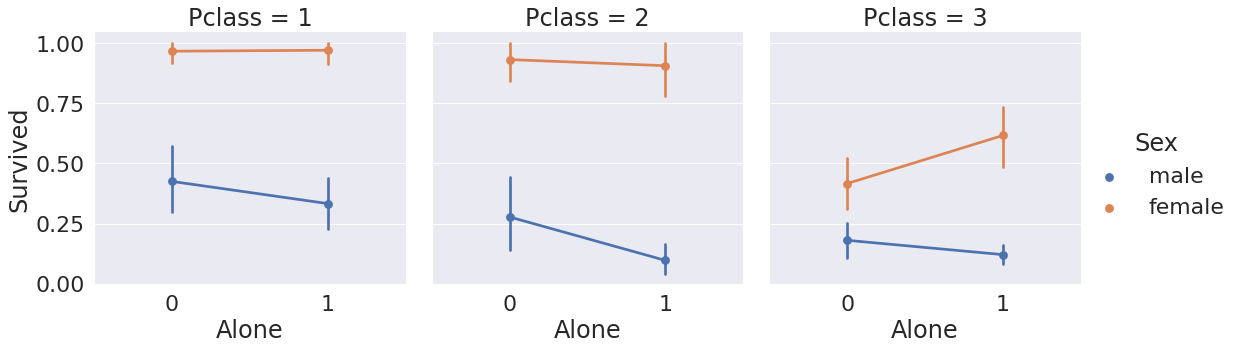

In [72]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.
- 이는 Pclass3의 가족과 있는 것보다 혼자가 더 비율이 높은 여자를 제외하고, 성별과 Pclass와 상관없이 혼자이면 좋지 않다.[](http://) 

### Fare_Range

since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.
- 요금은 연속적인 특성이기대문에 우리는 순서있는 값으로 바꿔야한다. pandas.qcut을 이용할다.

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.
- qcut은 범위에 해당하는 양자 개수를 동등하게 하여 범위를 나누는 것이다. 
- cut은 범위의 크기를 일정하게 하여 나누는 것이다.

In [73]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [74]:
data['Fare_Range'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare_Range, dtype: int64

As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.
- Fare_range가 증가하면 생존률도 증가한다는 것을 명확하게 알 수 있다.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band
- 우리는 Age_Band 처럼 양자화하여 변환해야한다.

In [75]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3


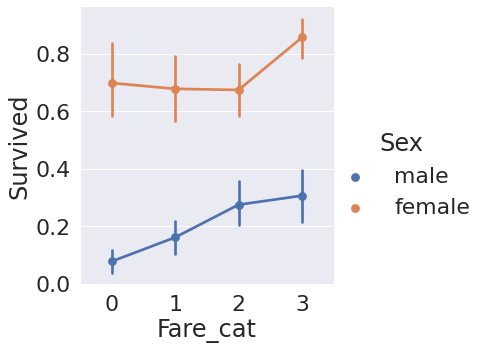

In [76]:
sns.factorplot('Fare_cat', 'Survived', data = data, hue = 'Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an importnat feature during modeling along with the Sex.
- 명백하게, Fare_cat이 증가함에 따라, 생존률도 증가한다. 이 특성은 성별에 관한 모델링을 하는 동안 중요한 특성이 될 수 있다. 

### Converting String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features look Sex, Embarked, etc into numeric values.
- 우리는 문자열을 머신러닝 모델이 넘길 수 없기 때문에, 우리는 Sex, Embarked등을 숫자의 값으로 변환해야한다.

LabelEncoder 사용 방법


```
from sklearn.preprocessing import LabelEncoder

cat_cols = [col for col in data.columns if data[col].dtypes == 'object']
cat_cols
for col in ['Sex', 'Embarked', 'Initial']:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

```

factorize로 라벨링하기 - LabelEncoder보다 속도가 빠름

```
indexer = {}
for col in ['Sex', 'Embarked', 'Initial']:
    _, indexer[col] = pd.factorize(data[col])
    
indexer[col].get_indexer(data[col])
```

필사 원본

In [77]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

Dropping UnNeeded Features
Name -> we don't need name feature as it cannot be converted into any categorical value.
- 이름은 분류형 데이터로 바꿀수 없기 때문에 필요 없다.

Age -> We have the Age_band feature, so no need of this.
- Age_band 특징이 있기 때문에 필요 없다.

Ticket -> It is any random string that cannot be categorised.
- 분류될 수 없는 랜덤 문자

Fare -> We have the Fare_cat feature, so unnedded
- Fare_cat 특징이 있기 때문에 필요 없다.

Cabin  -> A lot of NaN values and also many pasesenvers have muliple cabins. So this is a useless feature.
- 많은 빈 값과 많은 승객이 여러 cabin을 가지고 있기 때문에 쓸모없다.

Fare_Range -> We have the Fare_cat Feature.
- Fare_cat이 있다.

PassengerID -> Cannot be categorised.
- 분류될 수 없다.

In [78]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range','PassengerId'], axis = 1, inplace = True)

new_cat_pclass_sex, new_cat_pclass_sex_embarked는 실험을 위해 만든 것이기 때문에 이를 지워준다.

In [79]:
data.drop(['new_cat_pclass_sex', 'new_cat_pclass_sex_embarked'], axis = 1, inplace = True)

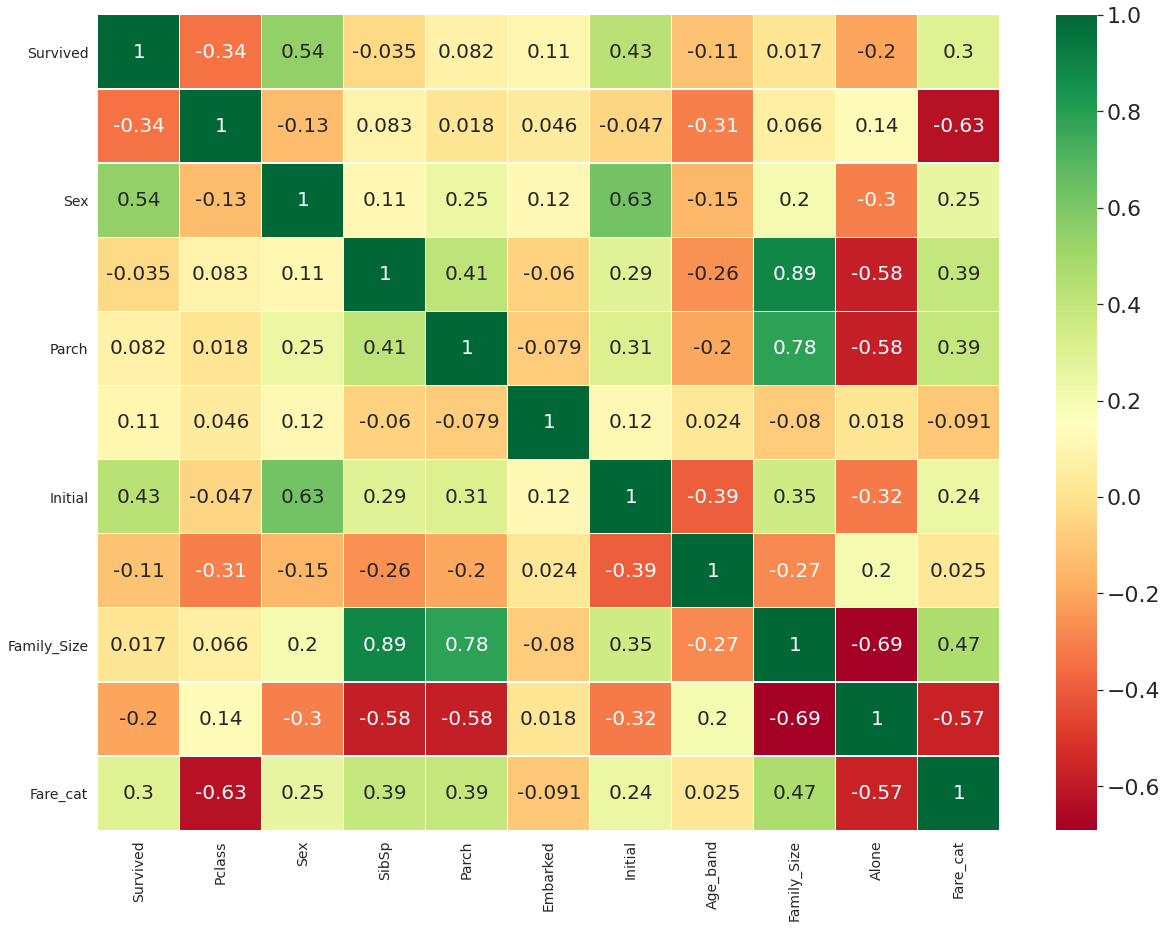

In [80]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size' : 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being SibSp and Family_size and Parch and Family_size and some negitive ones like Alone and Family_size
- 위의 상관관계를 보면 몇몇 양으로 관련된 특성들이 있다. SibSp와 Family_size 그리고 PArch와 Family_size이다. Alone과 Family_size처럼 음의 상관관계도 있다. 


# Part 3 : Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms Follwing are the algorithms I will use to make the model:

- 우리는 EDA에서 몇몇 인사이트를 얻었다. 하지만 이것으로는, 우리는 정확하게 승객이 죽는지 사는지 예측할 수 없다. 분류 알고리즘을 이용하여 모델을 만들 것이다.

1) Logistic Regression

2) Surpport Vector Machines(Linear and radial)

3) Random Forest

4) K-Nearest Neighbors

5) Naive Bayes

6) Decision Tree

7) Logistic Regression

In [123]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [133]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

참고

모델의 파라미터의 조정은 수동으로 하는 것이 좋다. 이는 어느정도 직관이 필요하다는 것을 의미한다. 
모델의 파라미터는 대회의 막판에 점수를 올리기위해서 실험을 통해 조정하는 것이다.

feature를 분류해 놓는 것이 오류를 줄일 수 있는 방법이다.
- categorical_features = ['Pclass', 'Sex', 'age_cat']
- numerical_features = ['Age', 'Fare']
이처럼 정리를 해놓는 것이 좋다.

feature가 많을 때는 df.DataFrame을 csv 파일로 만들어놓고 하는 것이 좋다.

### Radial Support Vector Machine(rbf-SVM)
방사상의 서포트 벡터 머신

In [134]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1, probability = True)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


**차트로 최적의 threshold 값 찾아보기**

SVM 모델은 probability = True를 설정해주어야 한다.

In [135]:
def op_threshold(model):
    score_array = []

    for temp_thres in np.arange(0, 1, 0.01):
        threshold = temp_thres
        prediction = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
        temp_score = 100 * metrics.accuracy_score(prediction, test_Y)
        score_array.append(temp_score)

    plt.plot(np.arange(0, 1, 0.01), score_array)
    plt.xlabel('threshold')
    plt.ylabel('accuracy score')
    plt.show()
    
    print('op_threshold = ', np.argmax(score_array))

0.43일 때 가장 정확도가 높았다는 뜻이고, 즉 기본값인 0.5보다 0.43으로 하면 더 정확도가 높다는 것을 알 수 있다.

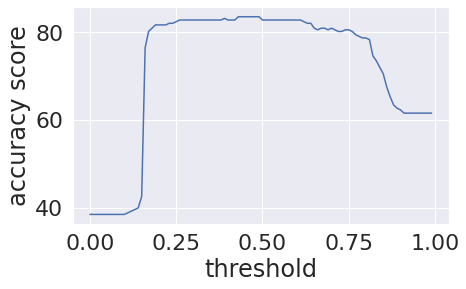

op_threshold =  43


In [136]:
op_threshold(model)

### Linear Support Vector Machine(linear-SVM)
선형 서포트 벡터 머신

In [137]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1, probability = True)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


**방사상 서포트 벡터 머신이 성능이 더 좋다.**

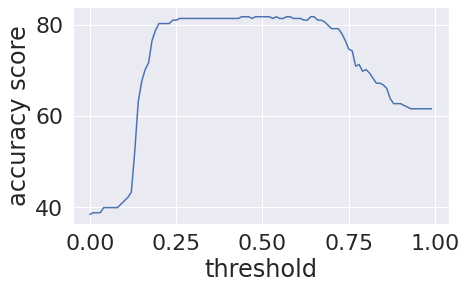

op_threshold =  44


In [89]:
op_threshold(model)

### Logistic Regression
선형 회귀

In [91]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


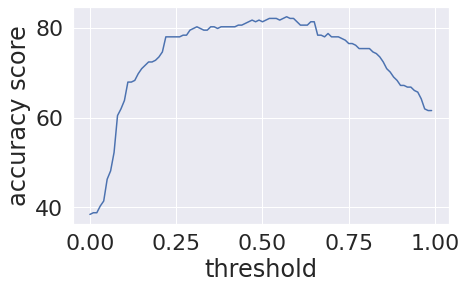

op_threshold =  57


In [92]:
op_threshold(model)

### Decision Tree
결정 트리

In [122]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.8097014925373134


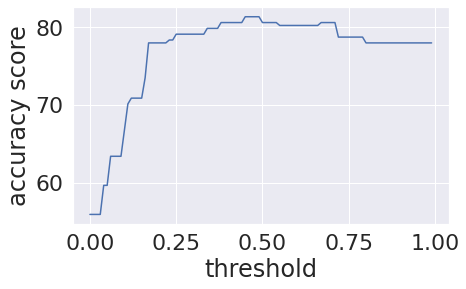

op_threshold =  45


In [94]:
op_threshold(model)

### K-Nearest Neightbors(KNN)

In [95]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is  0.832089552238806


Now the accuracy for the KNN model changes as we change the values for n_neighbors attribute. The default value is 5. Lets check the accuracies over various values of n_neighbors.
- n_neightbors에 따라 정확성이 바뀐다. 기본 값은 5이다. 다양한 n_neighbors의 값에 따른 정확도를 확인하자

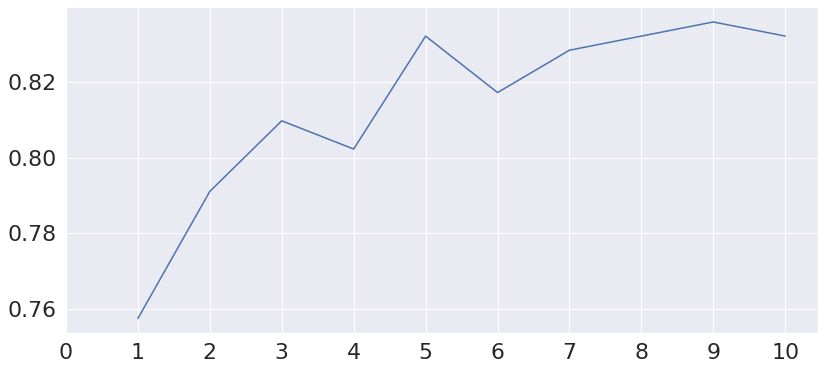

Accuracies for different values of n are : [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max values as  0.835820895522388


In [96]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are :', a.values, 'with the max values as ', a.values.max())

n = 9일 때 0.8358209로 가장 높았다.

### Gaussian Naive Bayes

In [97]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is  0.8134328358208955


### Random Forests

앙상블 기법이다.
앙상블을 하면 성능이 더 좋아진다.


In [98]:
model  = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forest is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forest is  0.8171641791044776


The accuracy of a model is not the only factor that determines the robustness of the clasifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.
- 모델의 정확도는 확실한 분류기를 결정하는 하나의 요소가 아니다. 분류기가 훈련 데이터로 훈련되고 테스트 데이터로 검증하고 정확도가 90%인 것을 보자.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over?? The answer is No, because we can't determine whicㅗ all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will alse change. it may increase or decrease. This is known as model variance.
- 이것은 아주 좋은 정확도를 가진 분류기이지만, 완전히 새로운 테스트 데이터가 주어질 때 90%가 될것을 확인 할 수 있는가? 그럴 수 없다. 왜나하면 우리는 모든 경우에 훈련할 때 스스로 사용할지 결정할 수 없기 때문이다. 훈련데이터와 테스트 데이터가 변화함에 따라, 정확도는 바뀐다. 증가할 수도 감소할 수도 있다. 이것은 model variance 모델 변수 라고 한다. 

To overcome this and get a generalized model, we use Cross Validation.
- 이를 극복하기 위해서 Cross Validation을 사용한다.

### Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.
- 자주, 데이터는 불균형적이다, 즉 class1 경우에는 높은 숫자이기도, 그러나 다른 경우에는 낮은 숫자일 수도 있다. 따라서 우리는 모든 경우의 데이터 셋을 알고리즘에 훈련하고 테스트 해야한다. 그러면 우리는 데이터셋으로부터 정확도의 평균을 얻을 수 있다.

1) the K-Fold Cross Validation works by first dividing the dataset into k-subsets.
- K-Fold Cross Validation은 처음에 데이터셋을 K-subsets로 나눈다.

2) Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.
- 데이터 셋을 5개 부분으로 나눈 것을 말해보자. 우리는 1부분은 테스트에 사용하고 나머지 4부분은 훈련에 사용한다.

3) We continue the precess by changing the testing part in each iteration and training the algorigthm over the other parts. The accuracies and errors are then averaged to get average accuracy of the algorithm.
- 우리는 테스트 부분을 바꿔가면서 진행한다. 정확도와 오차는 알고리즘의 평균 정확도로 평균된다.

this is called K-Fold Cross Validation.

4) An algorithm may underfit over a dataset for some training data and somtimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalized model.
- 알고리즘은 때로는 몇몇 훈련 데이터에 underfit 되거나 overfit 되기도 한다. 따라서 Cross-Validation으로 우리는 일반적인 모델을 얻을 수 있다.

**=> 결국, 데이터 셋 예측의 평균과 표준편자를 얻는 것이다. 평균이 높다는 것은 그만큼 정확도가 높다는 것을 의미하고, 표준편차가 낮다는 것은 데이터 셋에 둔감하게 예측하는 모델이라는 것을 의미한다.**

In [99]:
from sklearn.model_selection import KFold # for K-fold cross validattion
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits = 10, random_state = 22) # k = 10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm',
               'Radial Svm',
               'Logistic Regression',
               'KNN',
               'Decision Tree',
               'Naive Bayes',
               'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'),
          LogisticRegression(),
          KNeighborsClassifier(n_neighbors = 9),
          DecisionTreeClassifier(), GaussianNB(),
          RandomForestClassifier(n_estimators = 100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std' : std}, index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.810350,0.027535
Naive Bayes,0.801386,0.028999
Random Forest,0.814844,0.031678


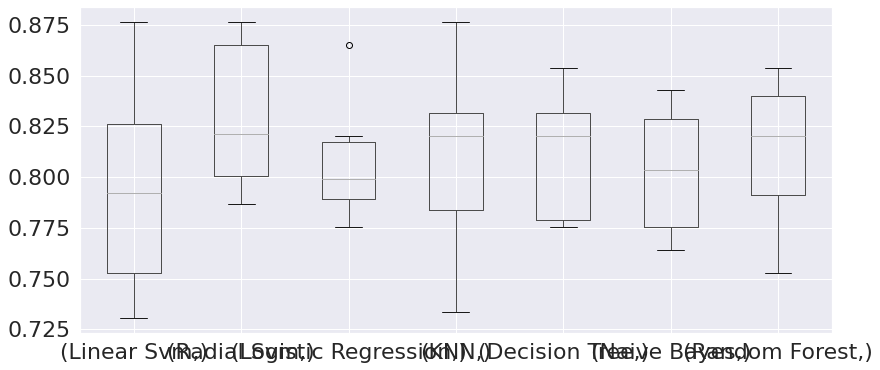

In [100]:
plt.subplots(figsize = (12, 6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

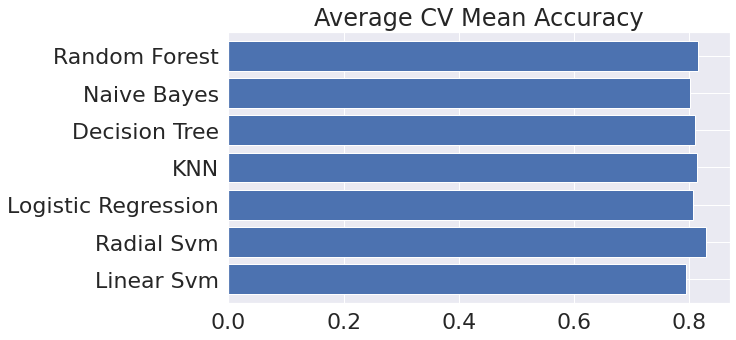

In [101]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.
- 분류 정확도는 때때로 불균형 대문에 잘못 해석할 수 있다. 우리는 Confusion Matrix으로 요약된 결과를 얻을 수 있다. 모델이 잘못되는지 어떤 클래스가 모델 예측을 잘못되게 하는지


imbalance 문제는 사망자가 99명이고 생존자가 1명 과 같은 불균형한 데이터 셋을 의미한다.
대부분은 imbalance 하기 때문에 accuracy 로 잘 평가하지 않는다.

### Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.
- 이것은 분류기에 의해 만들어진 많은 맞고 틀리는 분류를 준다. 

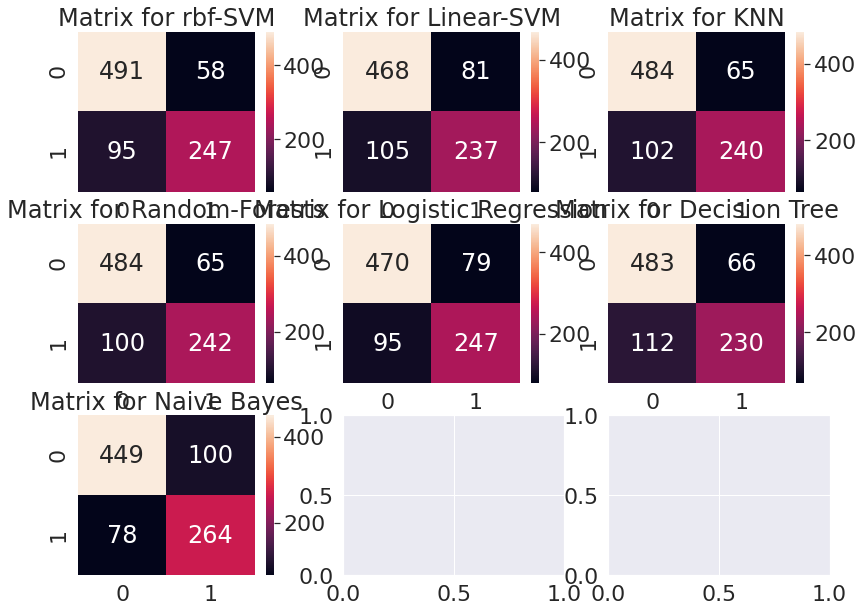

In [102]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

y축이 실제 값, x 축이 예측 값으로 0, 0이면 실제 사망한 사람을 사망했다고 판단한 것이라는 의미이다.

김태영 케라스 블로그 참고

**Interpreting Confusion Matrix**

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong predictions made. Lets consider the first plot for rbf-SVM:
- 왼쪽 위와 오른쪽 아래는 맞게 예측한 숫자기고 오른쪽 아래와 왼쪽 위는 잘 못 예측한 것이다. 

1) the no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being(491 + 247)/891 = 82.8% which we did get earlier.
- 맞게 예측한것은 491 + 247 개이며 이는  CV accuracy로 82.8% 이며, 전에 얻었다.

2) Errors-> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.
- 오류-> 잘못 예측한 사람은 58명을 죽었느데 살았다고 했고 95명을 살았는데 죽었다고 했다. 따라서 살았는데 죽었다고 잘못 예측한 것이 더 많았다.

By looking at all the matrixes, we can say that rbf-SVM has a highter chance in correctly predicting dead passengers but NaiveBayes has a highter chance in corerectly predicting passenger who survived.
- 모든 행렬을 보면, 우리는 rbf-SVM이 죽은 승객을 높은 확률로 맞게 예측했고, 반면 NaiveBayes가 산 사람을 더 잘 예측했다.

**Hyper-Parameters Tunning**

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. this is known as Hyper-Parameters Tuning.
- 머신러닝 모델은 블랙 박스와 같다. 우리가 조정하고 바꿔서 더 좋은 모델을 얻을 수 있는 기본적인 파라미터 값들이 있다. SVM의 C와 gamma와 같이 다른 분류기를 위한 비슷하게 다른 파라미터들과 같이, 우리가 학습비율을 바꿀 수 있는 것을  hyper-parameters라고 부른다.이것이 Hyper-parameter tuning이라고 한다.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.
- 우리는 SVM과 RandomForest의 hyper-parameters를 조정할 것이다.

방법
- Manual tuning
- Gridsearch search
- Randomized search
- Baysian optimiztion

### SVM

In [104]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   22.0s finished


### Random Forests

In [105]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   37.2s finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


The best score for Rbf-Svm is 82.82% with C=0.4 and gamma = 0.3 For RandomForest, score is abt 81.9% with n_estimators = 300

### Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. insimple words, it is the combination of various simple models to create a single powerful model
- 앙상블은 모델으 정확도를 높이거나 성능을 높이는데  좋은 방법이다. 간단히, 이것은 다양한 간단한 모델들의 결합으로 하나의 강력한 모델을 만드는 것이다.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:
- 예를 들어, 우리가 휴대폰을 사고 싶고 다양한 파라미터에 대해 많은 사람에게 물어본다. 그래서 우리는 모든 다른 파라미터를 분석하여 하나의 제품을 판단할 수 있다. 이것이 앙상블이다. 모델의 안정성을 높이는 것이다. 앙상블은 다음의 방법이 있다.

1) Voting Classifier

2) Bagging

3) Boosting

**Voting Classifier**

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of different types.
- 이것은 많은 간단한 머신러닝 모델로 부터 결합된 예측을 하는 가장 간단한 방법이다. 이것은 모든 하위 모델의 예측을 기반으로 평균 예측 결과를 준다. 하위 모델이나 기저 보델은 모두 다른 종류이다.

In [107]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


**Bagging**

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging, there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers
- Bagging은 일반적인 앙상블 방법이다. 이것은 데이터 셋의 작은 부분에 비슷한 분류기를 적용하여 작동하고 모든 예측의 평균을 취한다. 평균을 취하기 때문에 변수의 축소가 있다. Voting Classifier과 다르게 Bagging은 비슷한 분류기를 사용한다.

Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbors, as small value of n_neighbors.
- Bagging은 큰 변화가 있는 모델에 적합하다. 예를 들면 결정트리나 랜덤포레스트이다. 우리는 KNN을 n_neighbors에 작은 값을 넣어 사용할 수 있다.

In [109]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuacy for bagged KNN is :', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuacy for bagged KNN is : 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


Bagged DecisionTree

In [110]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8227590511860174


**Boosting**

Boosting is an ensembling technique which uses sequential learning of classifiers. it is a step by step enhancement of a weak model. Boosting works as follow:
- Boosting은 분류기의 연속적인 학습을 사용하는 양상블 기법이다. 이것은 차근차근 약한 모델의 강화가 이뤄진다. 


A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous. and new classifiers are added to the model until the limit is reached on the accuracy.
- 모델은 처음에 확전한 데이터 셋으로 훈련된다. 이제 모델은 맞는 경우는 얻는다. 이제 다음 단계에서는, 학습자는 잘못 예측한 경우에 집중하거나 이것에 더 비중을 둔다. 따라서 이는 잘못된 경우를 맞게 예측하기를 시도한다. 이제 이는 단계적인 과정이 계속된다. 그리고 새로운 분류기는 정확성의 한계에 다다를때까지 추가된다.

**AdaBoost(Adaptive Boosting)**

The weak learner or estimator in this case is a Decision Tree. But we can change the default base_estimator to any algorithm of out choice.
- 약한 학습자나 예측자는 이 경우에는 Decision Tree이다. 그러나 우리는 기본 예측을 다른 선택의 어떤 알고리즘으로 바꾼다?


In [111]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.1)
result =  cross_val_score(ada, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for AdeBoost is: ', result.mean())

The cross validated score for AdeBoost is:  0.8249188514357055


- boosting Algo A - a, b, c, d, e, f, g, h, i, j, k ... weak learner boosting

- boosting Algo B - a, b, c, d, e, f, g, h, i, j, k ... weak learner boosting

- linear regression - C

- Voting(A, B, C)

=> Boosting은 자기 자신 모델에서 여러개로 파생해서 학습하는 것이고 Voting은 여러 모델에서 학습하는 것

**Stochastic Gradient Boosting** **굵은 텍스트**
확률론적인 경사도

Here too the weak learner is a Decision Tree.

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is : ', result.mean())

The cross validated score for Gradient Boosting is :  0.8115230961298376


**XGBoost**

In [113]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for XGBoost is: ',result.mean())

The cross validated score for XGBoost is:  0.8115480649188515


We got the hightest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning.
- AdaBoost에서 가장 높은 정확도가 나왔다.

**HyperParameter Tuning for AdaBoost**

In [115]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators' : n_estimators, 'learning_rate' : learn_rate}

gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  9.3min finished


The maximum accuracy we can get with AdaBoost is 82.93% with n_estimators = 100 and learning_rate = 0.1

**Confusion Matrix for the Best Model**

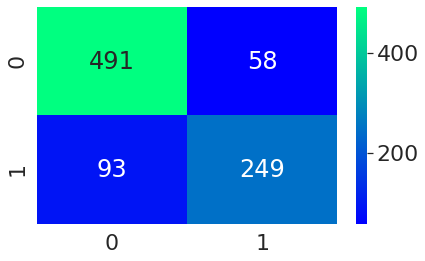

In [138]:
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.05)
result = cross_val_predict(ada, X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, result), cmap = 'winter', annot = True, fmt = '2.0f')
plt.show()

**Feature Importance**

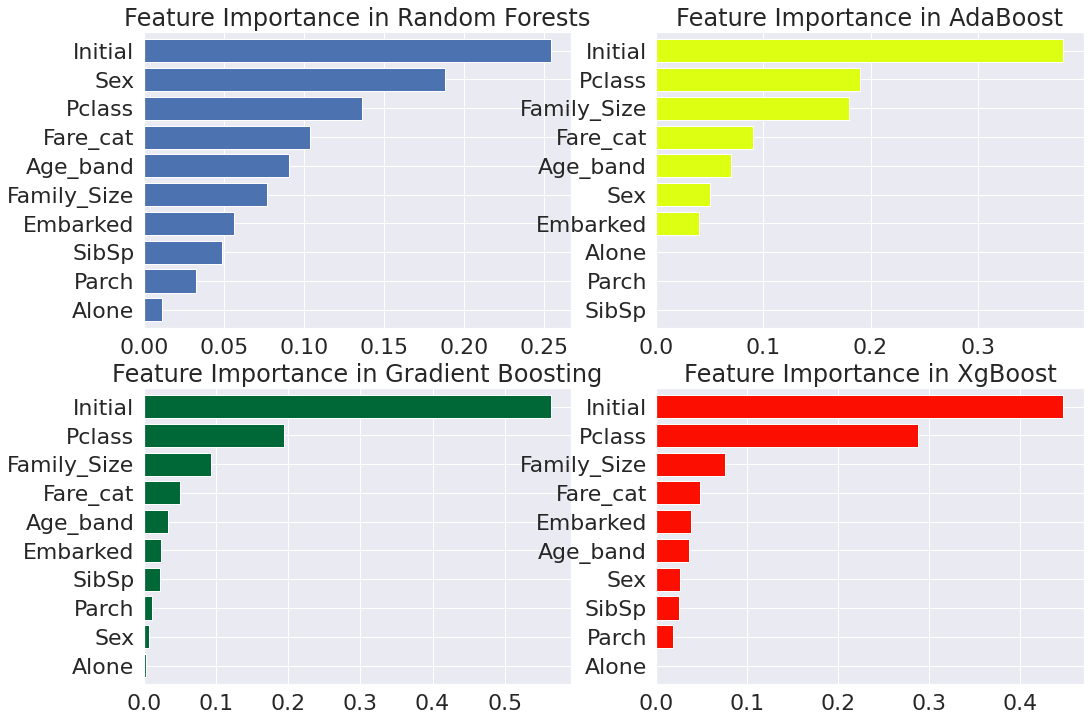

In [139]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost, etc.
- 우린는 RandomForests와 AdaBoost 등의 다양한 분류기의 중요한 특징을 알 수 있다.

**Observations**

1) Some of the common important features are Initial, Fare_cat, Pclass, Family_Size.
- 공통의 중요한 특징은 Initial, Fare_cat, Pclass, Family_Size 이다.

2) The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.
- 성별은 전에 우리가 Pclass와 결합해서 받은 매우 좋은 특징이었던것과 다르게 중요해보기지 않는다. 성별은 Randomforests에서만 중요해 보였다.

However, we can see the feature Initial, which is at the top in many classifiers. We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.
- 그러나, 우리는 Initial 특징이 많은 분류기에서 상위에 있는것을 알 수 있다. 우리는 성별과 Initial와 양의 상관관계인것을 이미 알고 있었고 그래서 그들은 gender라고 나타낸다.

3) Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone, Parch and Sibsp.
- 비슷하게 Pclass와 Fare_cat은 승객의 지위를 말하고 Family_Size와 Alone은 Parch와 SibSp를 말한다.

좋은 머신 러닝 노트북 참고

1) For R:
[Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/pliptor/divide-and-conquer-0-82297/notebook)

2)For Python:
[Pytanic by Heads and Tails](https://www.kaggle.com/headsortails/pytanic)

3)For Python:
[Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

# **필사 노트북 링크**
(https://www.kaggle.com/ash316/eda-to-prediction-dietanic)